In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from scipy import signal
import scipy as sp
import pandas as pd
import statsmodels
import statsmodels.stats.diagnostic as sm
import math
import scipy.stats

In [25]:
import numpy as np

def time_scale(x):
    mlag = round(len(x)/2)
    rho = np.correlate(x, x, mode='full')[len(x)-1:]
    corr = rho[mlag:]/rho[mlag]
    lags = np.arange(mlag+1)
    Tstar = 0.0
    i = 0
    while corr[i] >= 0:
        Tstar += (corr[i] + corr[i+1])/2
        i += 1
    autocor = corr
    return autocor, Tstar

In [26]:
dados = sc.loadmat('sea_level_ssh_tsl.mat')
ssh = dados['ssh_anom']
tsl = dados['tsl_anom']
lon = dados['lon_tsl']
lat = dados['lat_tsl']
time = dados['time']


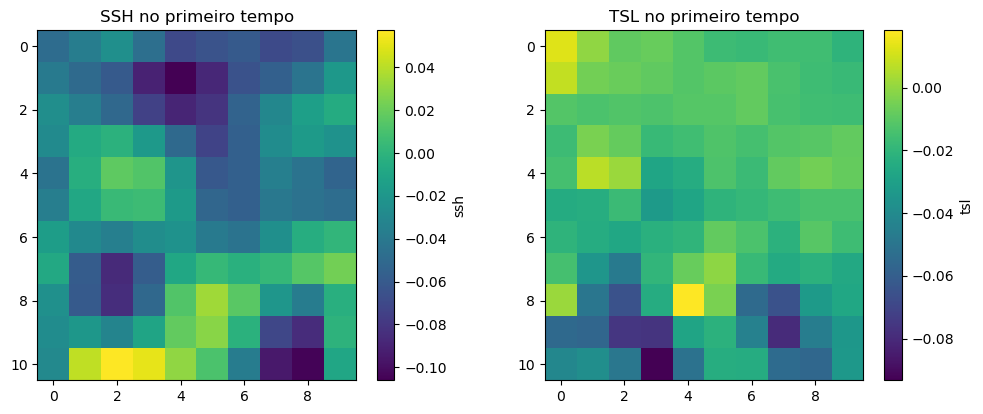

In [52]:
plt.style.use('default')

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('SSH no primeiro tempo')
plt.imshow(ssh[:,:,0])
plt.colorbar(label='ssh')
plt.subplot(222)
plt.title('TSL no primeiro tempo')

plt.imshow(tsl[:,:,0],label='tsl')
plt.colorbar(label='tsl')


In [28]:
autocorssh, Tstarssh = time_scale(ssh[2,2,:])
autocortsl, Tstartsl = time_scale(tsl[2,2,:])

Text(0.5, 0, 'lag')

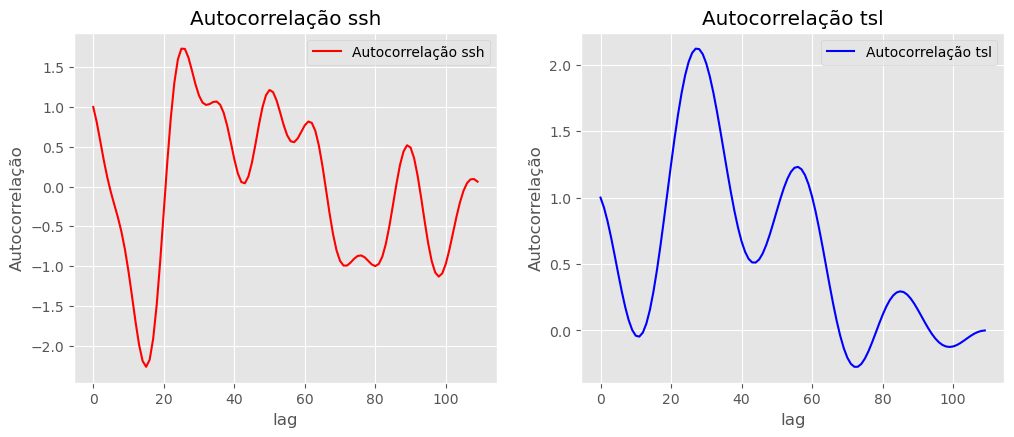

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(autocorssh,'r-', label='Autocorrelação ssh')
plt.title('Autocorrelação ssh')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')
plt.legend()
plt.subplot(222)
plt.plot(autocortsl,'b-' ,label='Autocorrelação tsl')
plt.legend()
plt.title('Autocorrelação tsl')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')

In [30]:
grauliberdadessh = len(ssh[2,2:])/Tstarssh
grauliberdadetsl = len(ssh[2,2:])/Tstartsl

In [31]:
correlacao,_ = scipy.stats.pearsonr(ssh[2,2,:],tsl[2,2,:])


In [32]:
cor = np.zeros_like(ssh[:,:,0])
for i in range (ssh.shape[0]):
    for j in range (ssh.shape[1]):
        cor[i,j],_ = scipy.stats.pearsonr(ssh[i,j,:],tsl[i,j,:])

Text(0.5, 1.0, 'Coeficientes de correlação cruzada para cada ponto da grade')

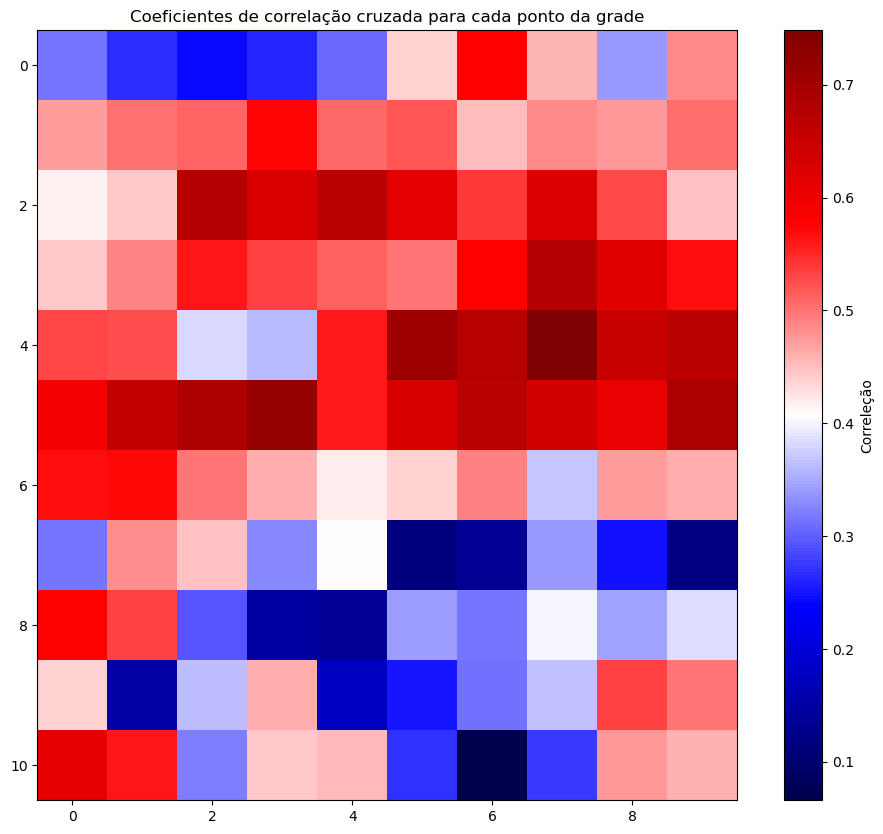

In [60]:
plt.style.use('default')
plt.figure(figsize=(12,10))
plt.imshow(cor,cmap='seismic')
plt.colorbar(label='Correleção')
plt.title('Coeficientes de correlação cruzada para cada ponto da grade')

In [34]:
dadasoi = pd.read_excel('soi.xls')
soi = dadasoi['1.5']
soi = np.array(soi)
soi = np.insert(soi,0,1.5)


In [74]:
dataco2 = np.loadtxt('co2_mm_mlo.txt')
co2 = dataco2[:,3]
tempo = dataco2[:,2]

In [36]:
co2i = co2
co2i = pd.Series(co2).interpolate().values

Text(0.5, 1.0, 'Concentração de CO2 de Mauna Loa')

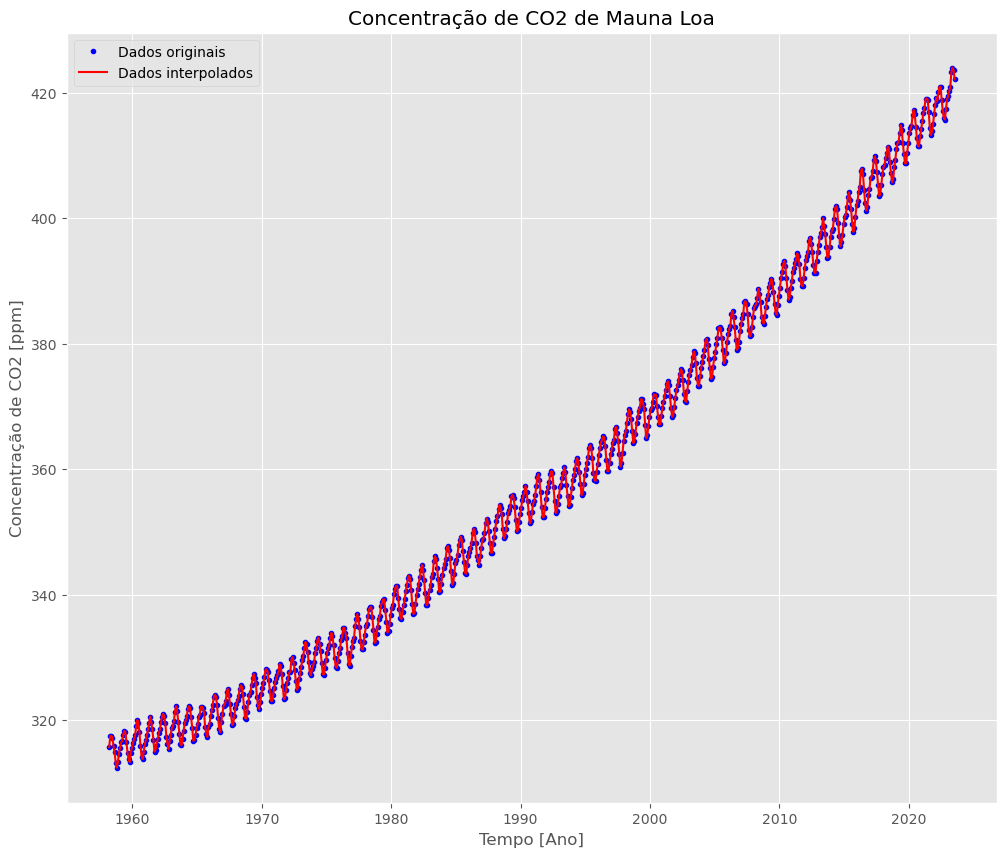

In [77]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.plot(tempo,co2,'b.', label='Dados originais')
plt.plot(tempo,co2i,'r-', label='Dados interpolados')
plt.ylabel('Concentração de CO2 [ppm]')
plt.xlabel('Tempo [Ano]')
plt.legend()
plt.title('Concentração de CO2 de Mauna Loa')


In [38]:
detrend=statsmodels.tsa.tsatools.detrend(co2i, order=3, axis=0)


Text(0.5, 1.0, 'Concentração de CO2 de Mauna Loa')

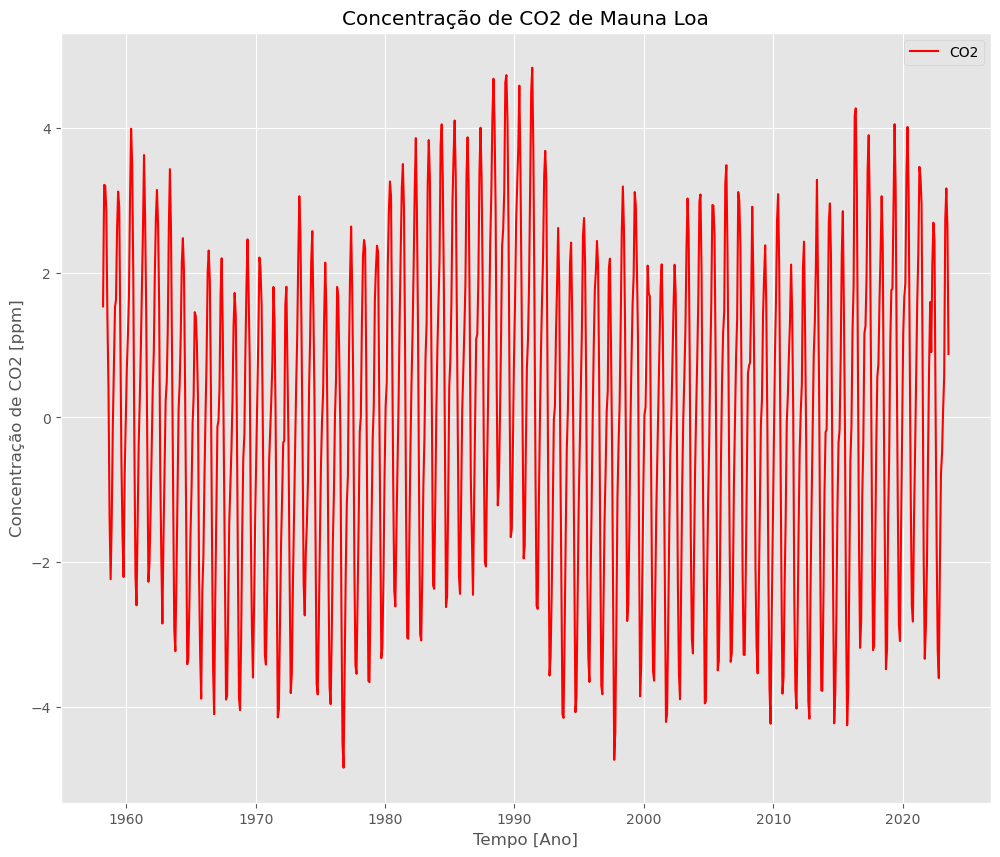

In [80]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.plot(tempo,detrend,'r-', label='CO2')

plt.ylabel('Concentração de CO2 [ppm]')
plt.xlabel('Tempo [Ano]')
plt.legend()
plt.title('Concentração de CO2 de Mauna Loa')


In [40]:
x = np.arange(0,len(co2i),step=1)
p30 = np.poly1d(np.polyfit(x, co2, 3))

Text(0.5, 1.0, 'Concentração de CO2 de Mauna Loa')

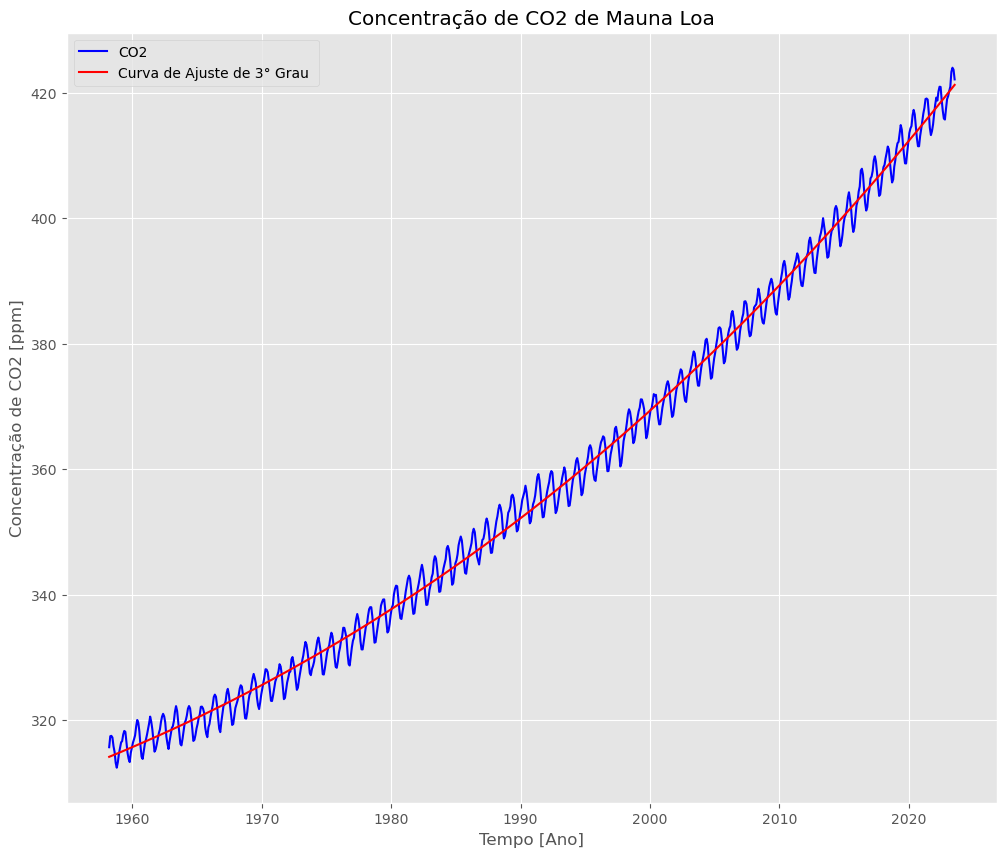

In [81]:
plt.figure(figsize=(12,10))
plt.plot(tempo,co2i,'b-', label='CO2')
plt.plot(tempo,p30(x),'r-', label='Curva de Ajuste de 3° Grau ')
plt.legend()

plt.ylabel('Concentração de CO2 [ppm]')
plt.xlabel('Tempo [Ano]')
plt.legend()
plt.title('Concentração de CO2 de Mauna Loa')


Text(0.5, 1.0, 'Concentração de CO2 de Mauna Loa')

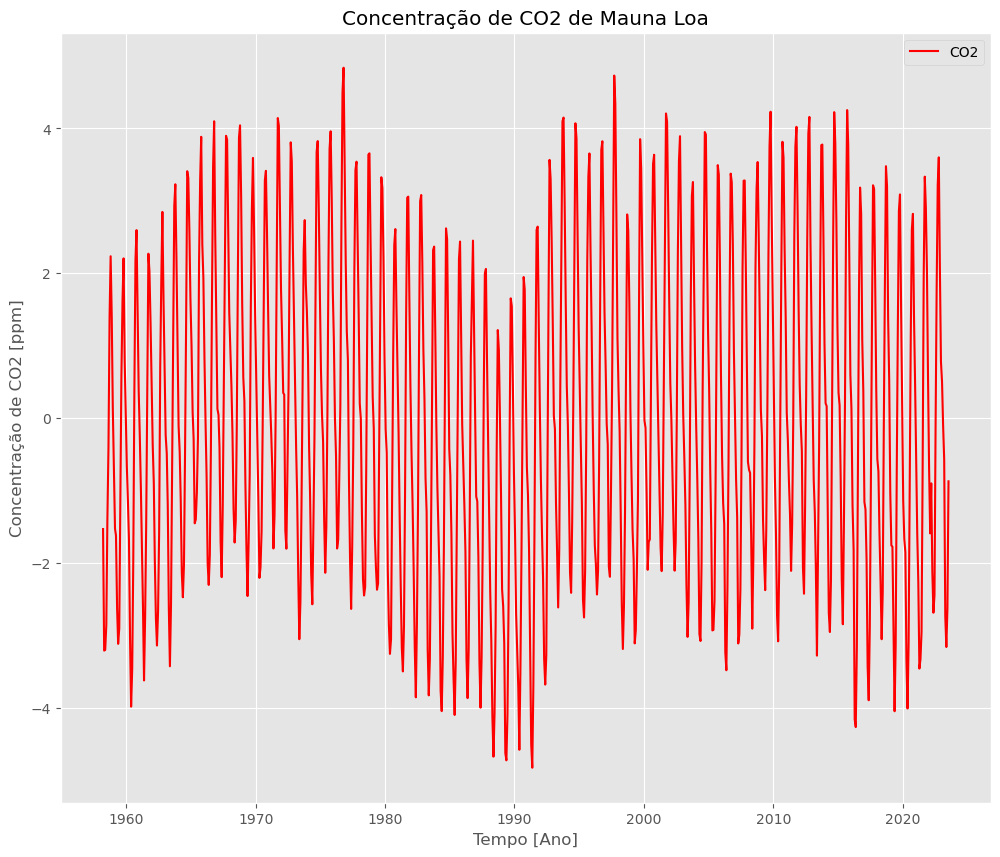

In [82]:
plt.figure(figsize=(12,10))
plt.plot(tempo,p30(x)-co2i,'r-', label='CO2')
plt.legend()

plt.ylabel('Concentração de CO2 [ppm]')
plt.xlabel('Tempo [Ano]')
plt.legend()
plt.title('Concentração de CO2 de Mauna Loa')

Text(0.5, 0, 'lag')

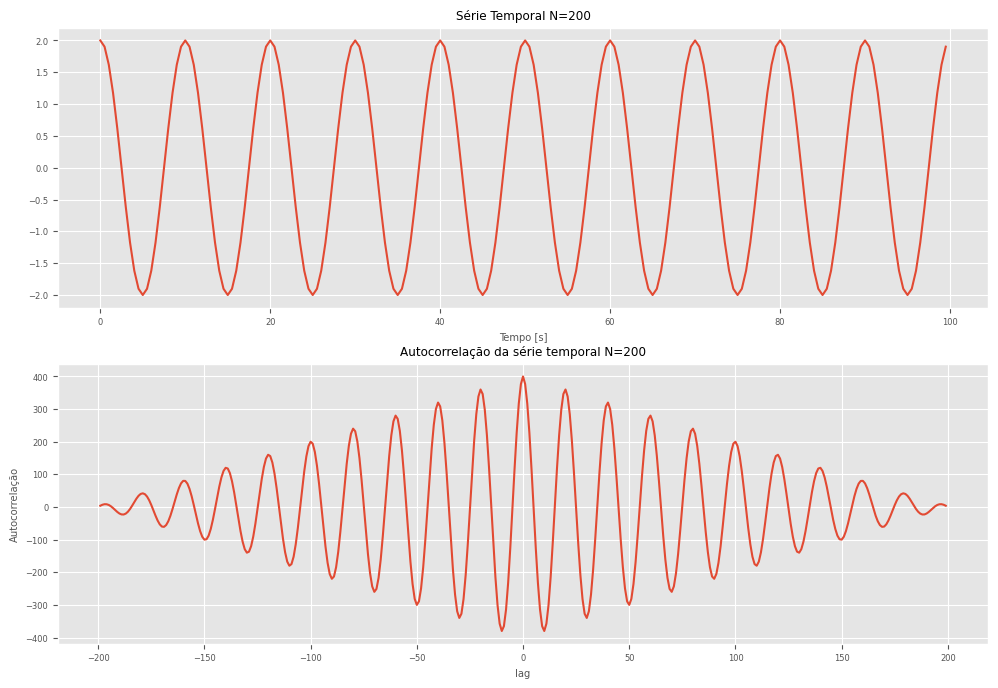

In [88]:
dt = 0.5
T = 10
N = 200
t = np.arange(0, N) * dt

y = 2 * np.cos((2 * np.pi / T) * t)

c, lags = np.correlate(y, y, mode='full'), np.arange(-N+1, N)
plt.rcParams.update({'font.size': 6})

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(t, y)
plt.title('Série Temporal N=200')
plt.xlabel('Tempo [s]')

plt.subplot(212)
plt.plot(lags, c)
plt.title('Autocorrelação da série temporal N=200')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')

Text(0.5, 0, 'lag')

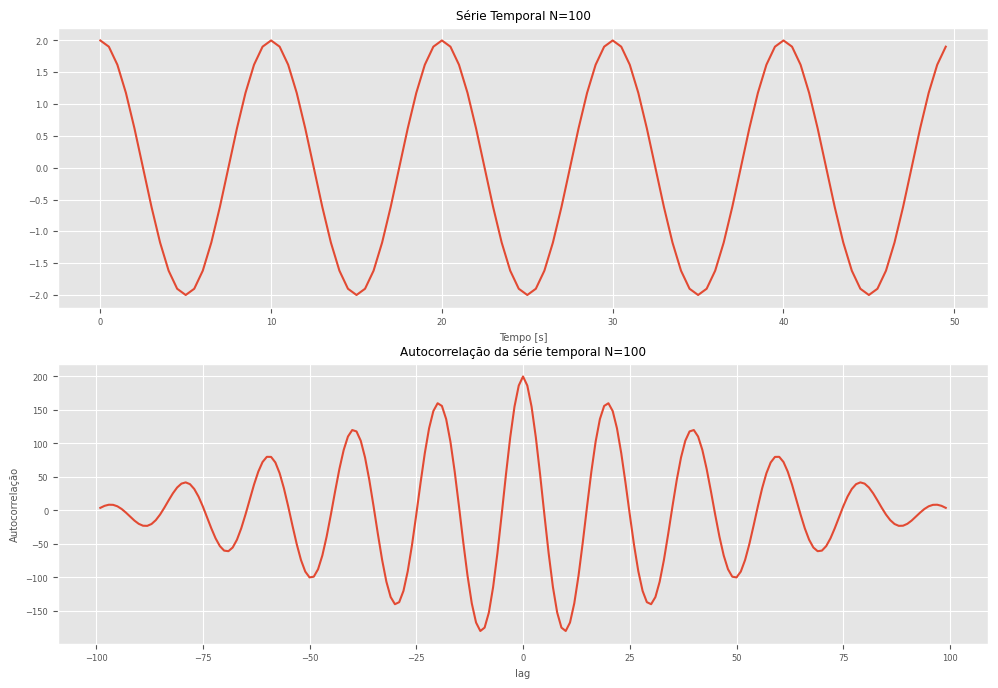

In [90]:
dt = 0.5
T = 10
N = 100
t = np.arange(0, N) * dt

y = 2 * np.cos((2 * np.pi / T) * t)

c, lags = np.correlate(y, y, mode='full'), np.arange(-N+1, N)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(t, y)
plt.title('Série Temporal N=100')
plt.xlabel('Tempo [s]')

plt.subplot(212)
plt.plot(lags, c)
plt.title('Autocorrelação da série temporal N=100')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')

Text(0.5, 0, 'lag')

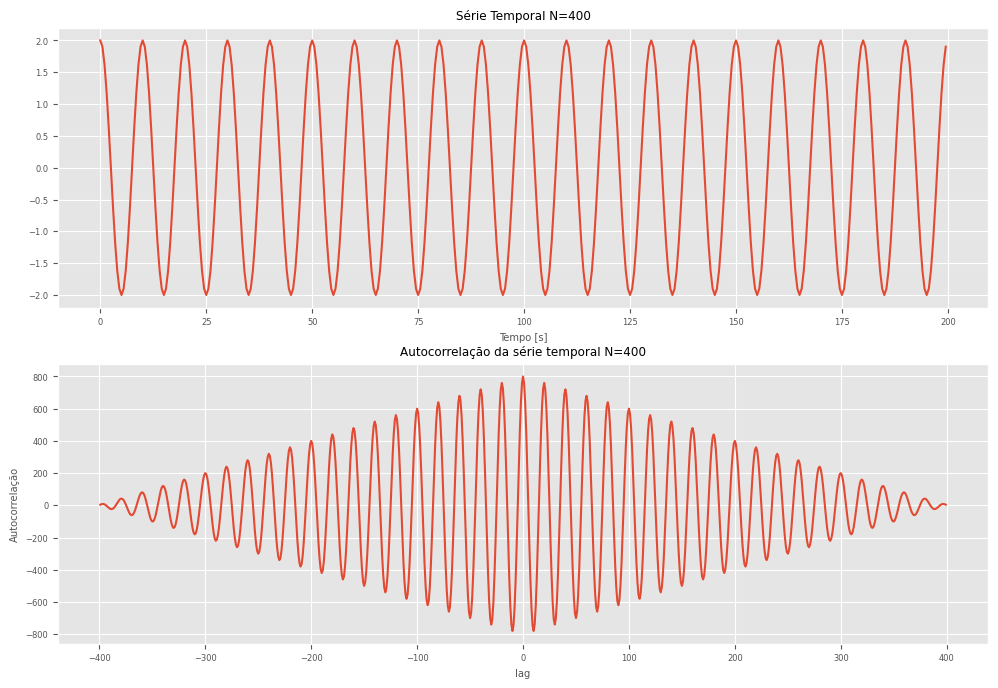

In [91]:
dt = 0.5
T = 10
N = 400
t = np.arange(0, N) * dt

y = 2 * np.cos((2 * np.pi / T) * t)

c, lags = np.correlate(y, y, mode='full'), np.arange(-N+1, N)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(t, y)
plt.title('Série Temporal N=400')
plt.xlabel('Tempo [s]')

plt.subplot(212)
plt.plot(lags, c)
plt.title('Autocorrelação da série temporal N=400')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')

In [96]:
xc = np.correlate(co2, co2, 'full') 
xd = np.correlate(p30(x)-co2i, p30(x)-co2i, 'full')
lag = np.linspace(0, 60,num=1569)

Text(0.5, 0, 'lag')

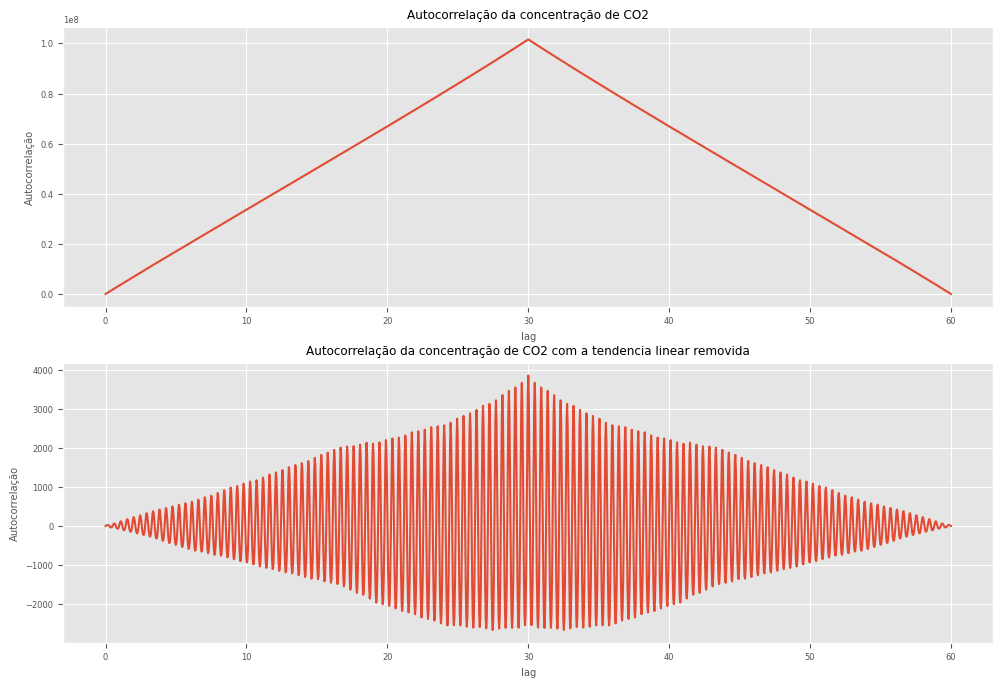

In [97]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(lag,xc)
plt.title('Autocorrelação da concentração de CO2')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')
plt.subplot(212)
plt.plot(lag,xd)
plt.title('Autocorrelação da concentração de CO2 com a tendencia linear removida')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')

In [98]:
sm.lilliefors(p30(x)-co2,dist='norm')

(0.0535200451467871, 0.0009999999999998899)

Text(0.5, 0, 'lag')

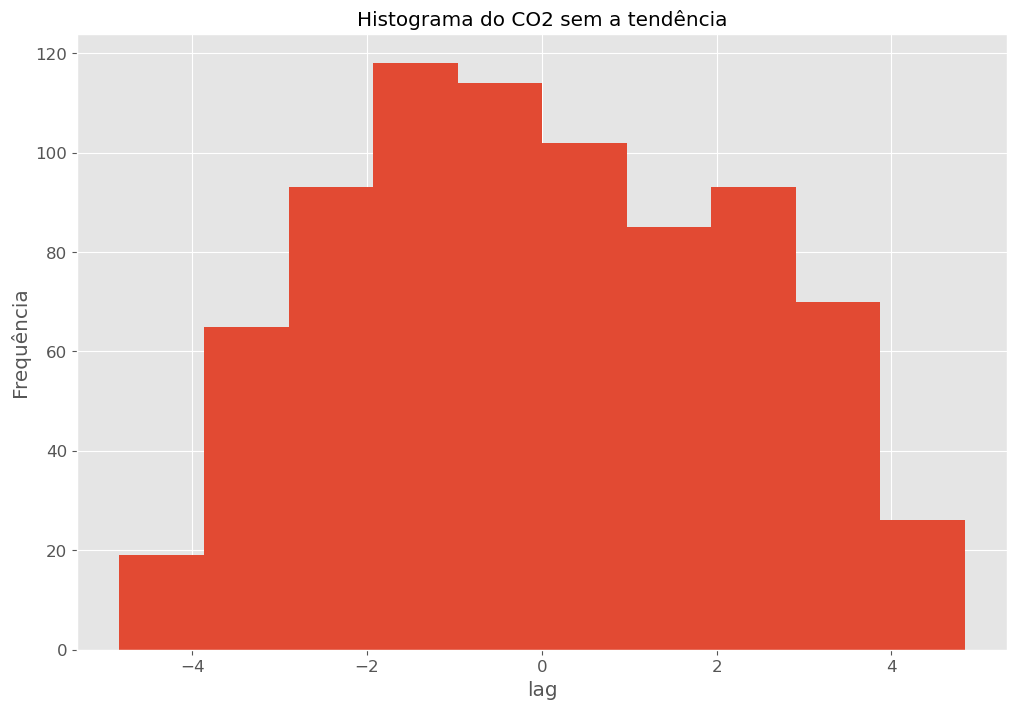

In [107]:
plt.figure(figsize=(12,8))
plt.hist(p30(x)-co2)
plt.rcParams.update({'font.size': 10})

plt.title('Histograma do CO2 sem a tendência')
plt.ylabel('Frequência')
plt.xlabel('lag')


In [114]:
soic = np.correlate(soi, soi, 'full') 
x = np.arange(0,len(soi),step=1)
p30 = np.poly1d(np.polyfit(x, soi, 3))
lag = np.linspace(0, 60,num=len(soic))
soicd = np.correlate(p30(x)-soi, p30(x)-soi, 'full') 


Text(0.5, 0, 'lag')

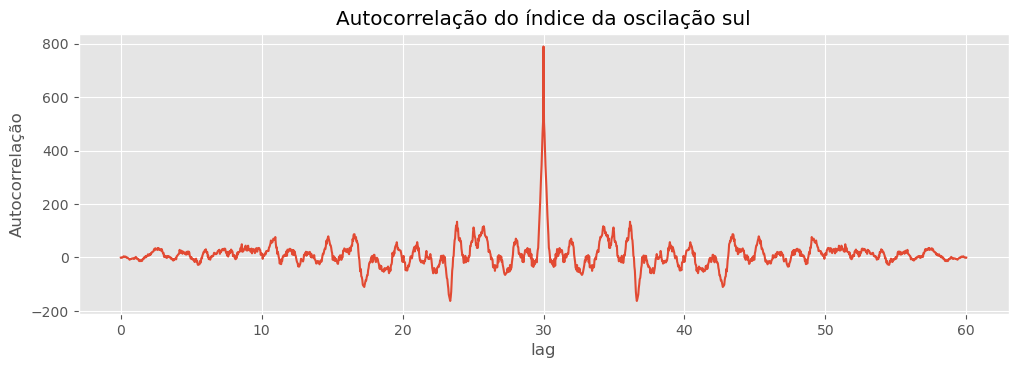

In [119]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(lag,soic)
plt.title('Autocorrelação do índice da oscilação sul')
plt.ylabel('Autocorrelação')
plt.xlabel('lag')